In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# Import CSV
full_df = pd.read_csv('medical_clean.csv')

In [3]:
# List columns
full_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Reduce dataset to necessary columns related to research question
columns = ['Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 
           'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 
           'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 
           'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges']
df = full_df[columns].copy()

# Check for null values

In [5]:
# Initial check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   ReAdmis             10000 non-null  object 
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Soft_drink          10000 non-null  object 
 8   Initial_admin       10000 non-null  object 
 9   HighBlood           10000 non-null  object 
 10  Stroke              10000 non-null  object 
 11  Complication_risk   10000 non-null  object 
 12  Overweight          10000 non-null  object 
 13  Arthritis           10000 non-null  object 
 14  Diabetes            10000 non-null  object 
 15  Hyperlipidemia      10000 non-null  object 
 16  BackP

In [6]:
# Check for abnormal representations of null values. Also helps with checking for partial duplicates.
for col in columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()
    print()

Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: Age, Length: 72, dtype: int64


Income
14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64


ReAdmis
No     6331
Yes    3669
Name: ReAdmis, dtype: int64


VitD_levels
18.135431    2
15.939760    2
17.821860    2
20.184170    2
18.741340    2
            ..
18.825293    1
16.849021    1
15.111106    1
20.583694    1
18.388620    1
Name: VitD_levels, Length: 9976, dtype: int64


Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: Doc_visits, dtype: int64


Full_meals_eaten
0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: Full_meals_eaten, dtype: int64


vitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: vitD_supp, 

# Check for duplicates

In [7]:
# Check for complete duplicates
if df.duplicated().any():
    print('Has complete duplicates')
else:
    print('No complete duplicates')

No complete duplicates


# Check for outliers

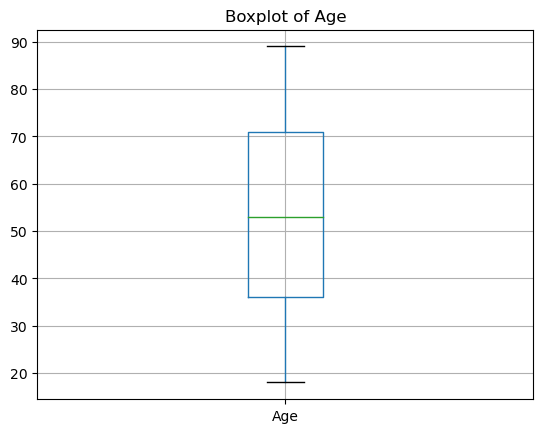

Age has 0 outliers


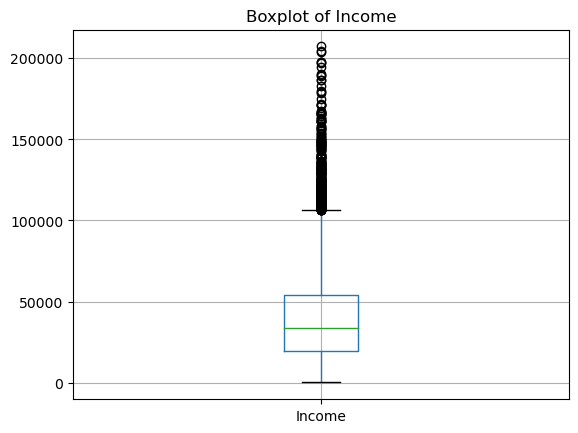

Income has 326 outliers

Value counts for ReAdmis
No     6331
Yes    3669
Name: ReAdmis, dtype: int64



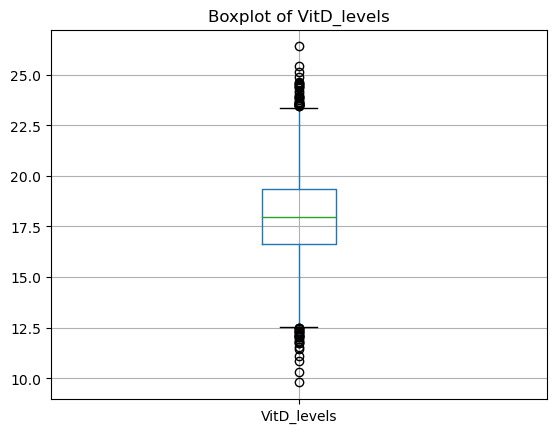

VitD_levels has 60 outliers


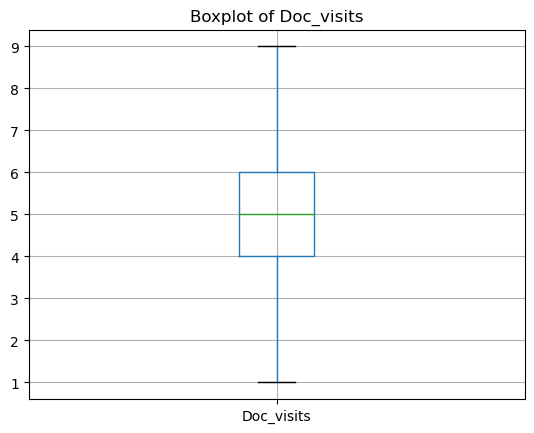

Doc_visits has 0 outliers


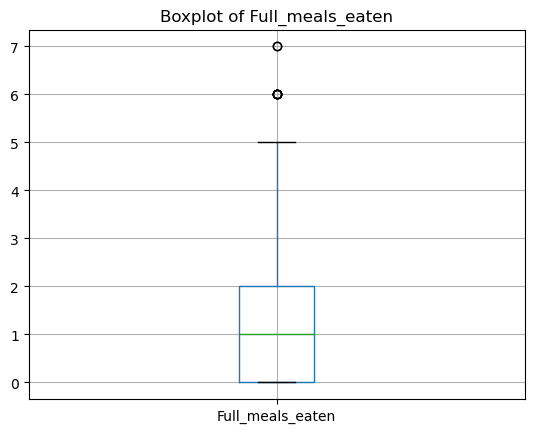

Full_meals_eaten has 8 outliers


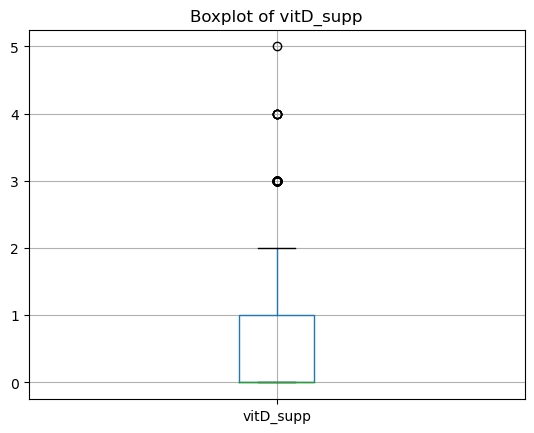

vitD_supp has 70 outliers

Value counts for Soft_drink
No     7425
Yes    2575
Name: Soft_drink, dtype: int64


Value counts for Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64


Value counts for HighBlood
No     5910
Yes    4090
Name: HighBlood, dtype: int64


Value counts for Stroke
No     8007
Yes    1993
Name: Stroke, dtype: int64


Value counts for Complication_risk
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64


Value counts for Overweight
Yes    7094
No     2906
Name: Overweight, dtype: int64


Value counts for Arthritis
No     6426
Yes    3574
Name: Arthritis, dtype: int64


Value counts for Diabetes
No     7262
Yes    2738
Name: Diabetes, dtype: int64


Value counts for Hyperlipidemia
No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64


Value counts for BackPain
No     5886
Yes    4114
Name: BackPain, dtype: int64


Value counts for Anxiety
No 

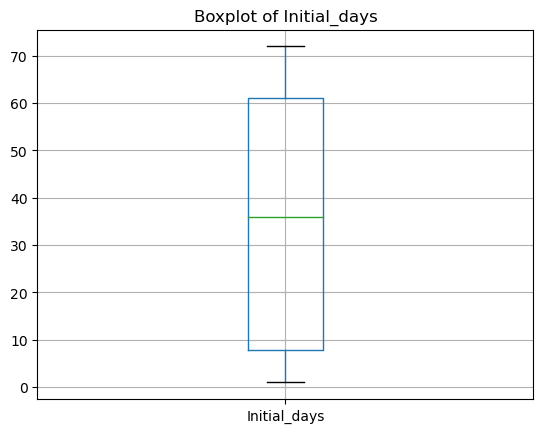

Initial_days has 0 outliers


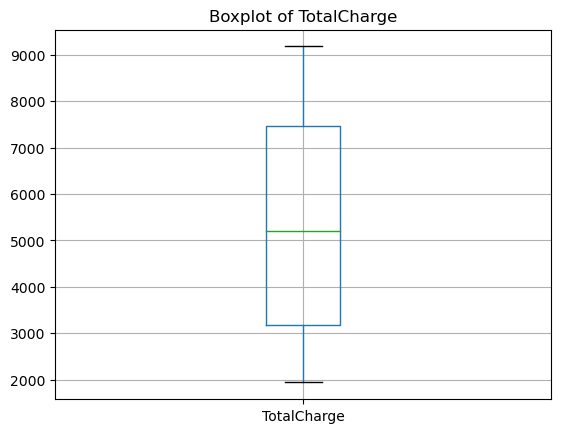

TotalCharge has 0 outliers


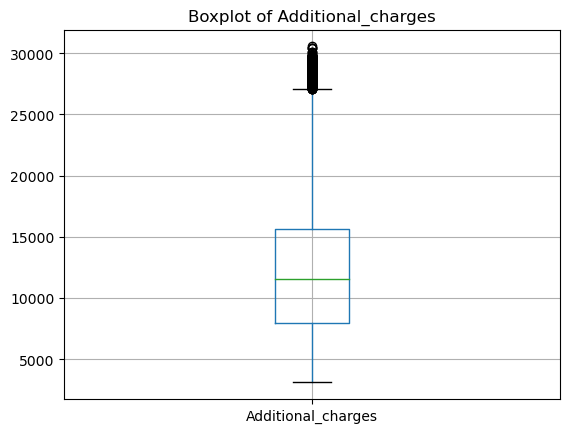

Additional_charges has 424 outliers


In [8]:
# Create boxplot and if outliers exist, calculate using IQR method
for col in columns:
    if df[col].dtype != 'object':
        # Create boxplot
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()
        
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{col} has {num_outliers} outliers")     
        
        
    else:
        # For categorical variables, determine if any category makes up a small percentage
        print()
        print(f'Value counts for {col}')
        print(df[col].value_counts())
        print()

In [9]:
# Make a copy of dataset to remove outliers later. 
# This will be used for comparing the model with and without outliers
# Because I've already tested removing outliers and saw that it was best to leave them in, 
# the next sections of code will apply to the set containing outliers
df_outliers_removed = df.copy()

# Summary Statistics

In [10]:
# Produce summary statistics for each variable
for col in columns:
    print(f'Summary statistics for {col}')
    print(df[col].describe())
    print()

Summary statistics for Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

Summary statistics for Income
count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

Summary statistics for ReAdmis
count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

Summary statistics for VitD_levels
count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

Summary statistics for Doc_visits
count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%        

# Univariate Visualizations

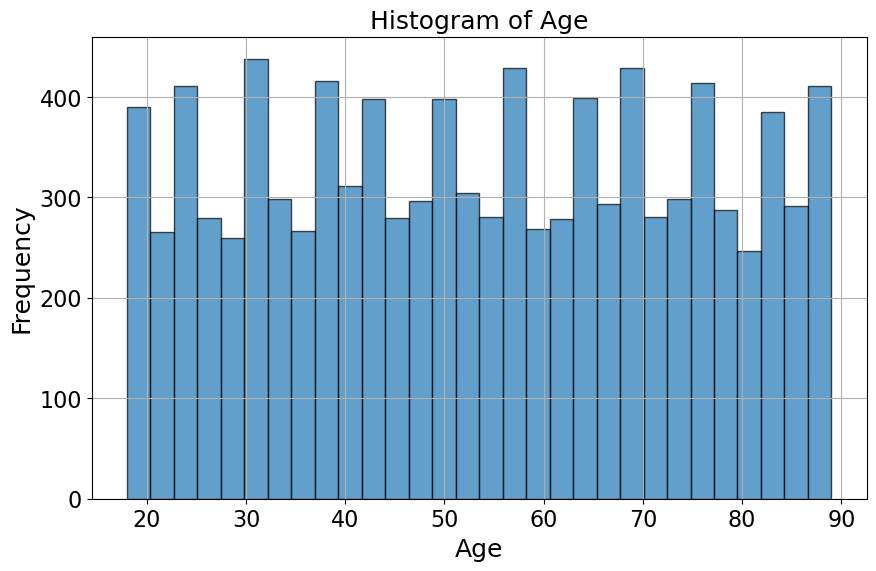

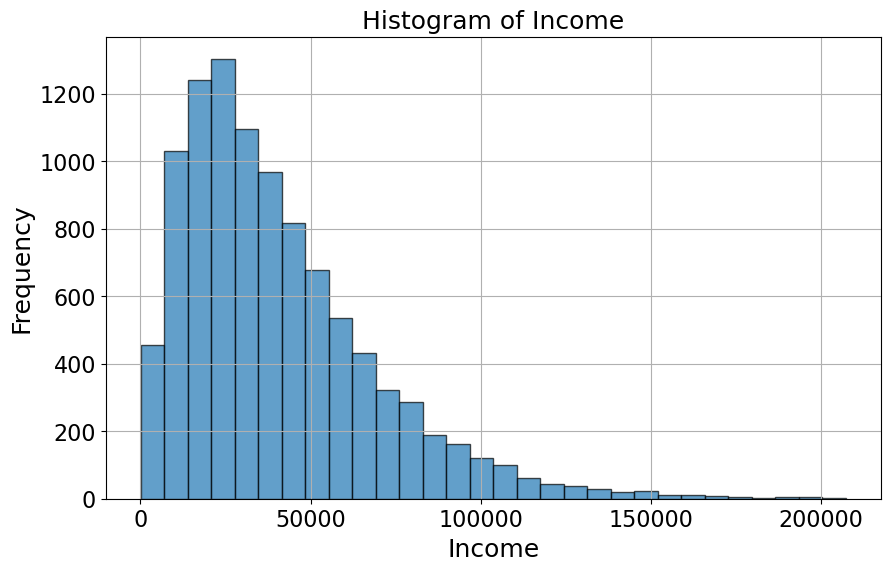

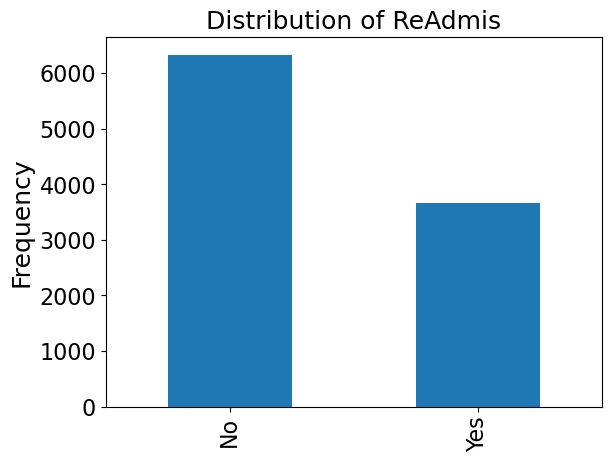

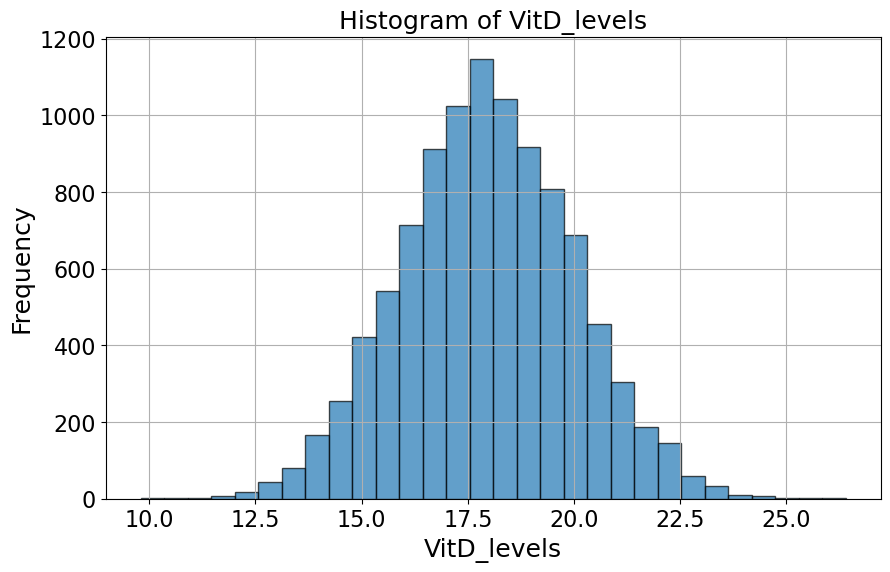

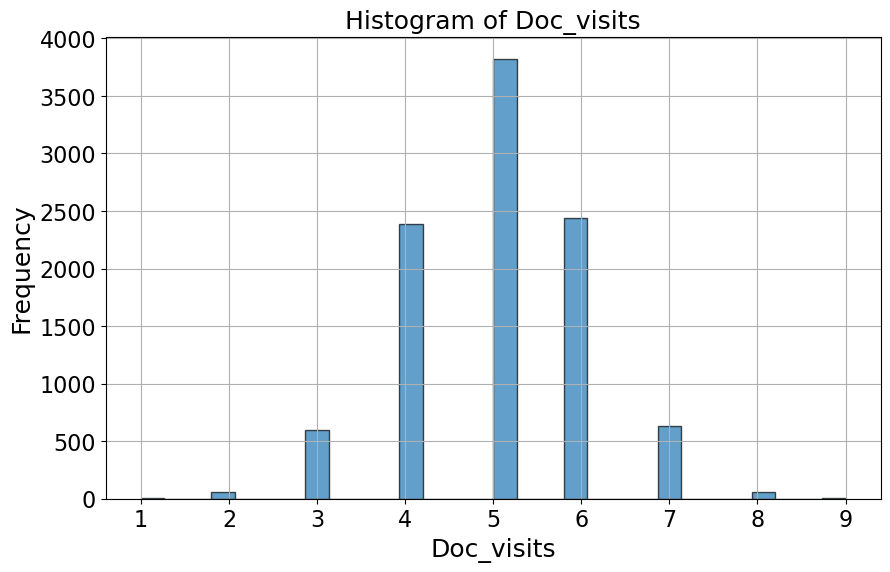

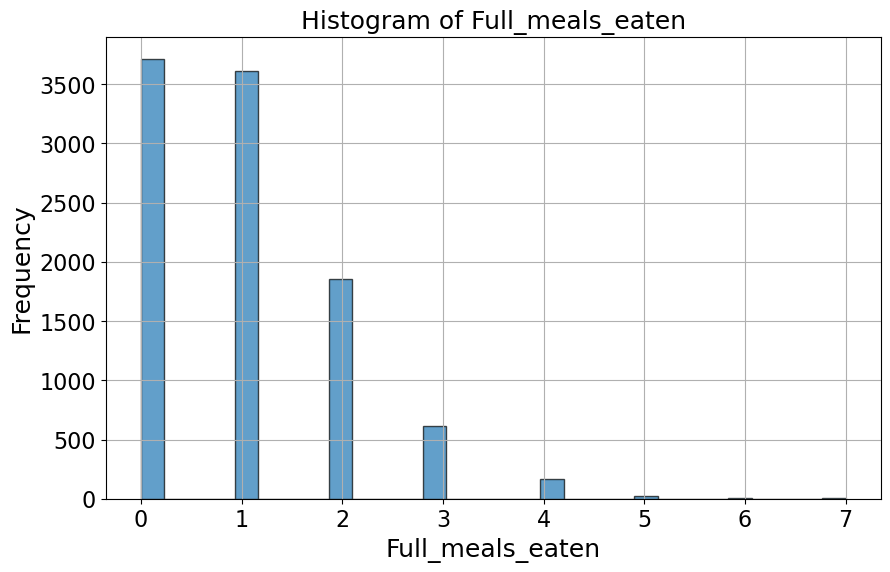

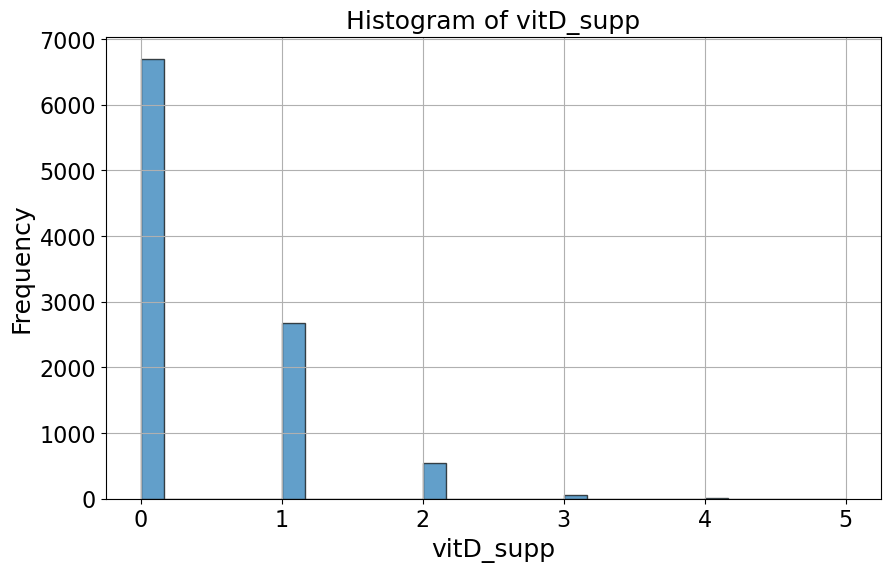

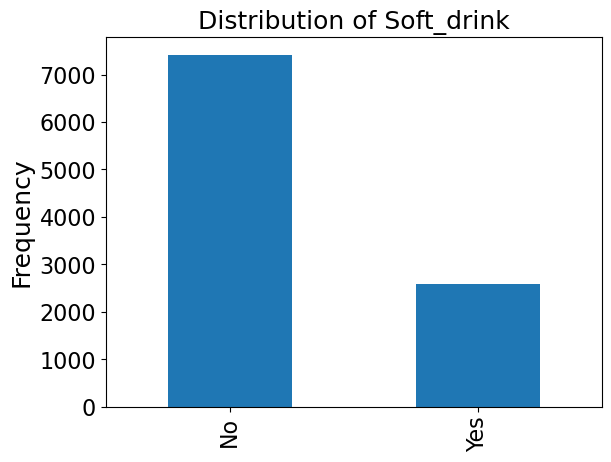

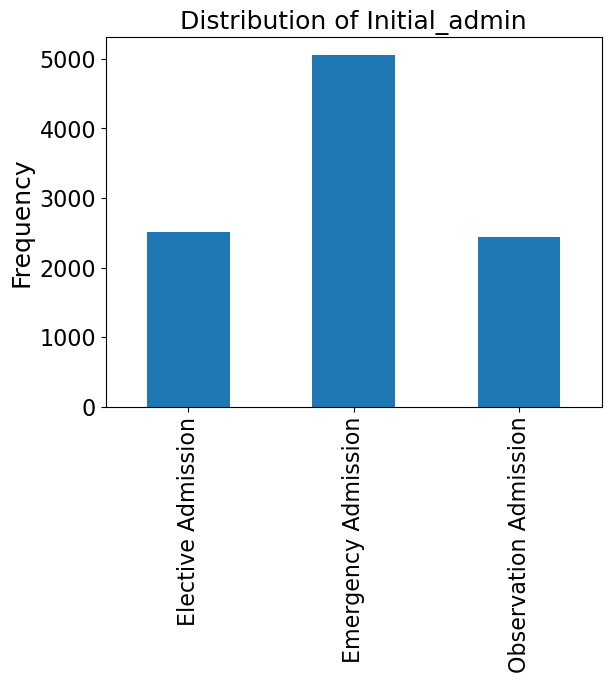

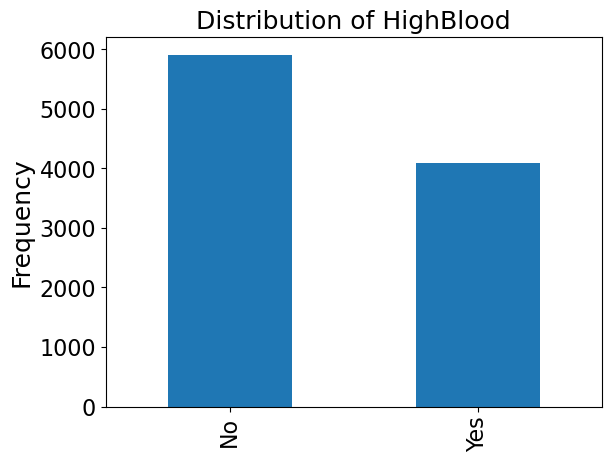

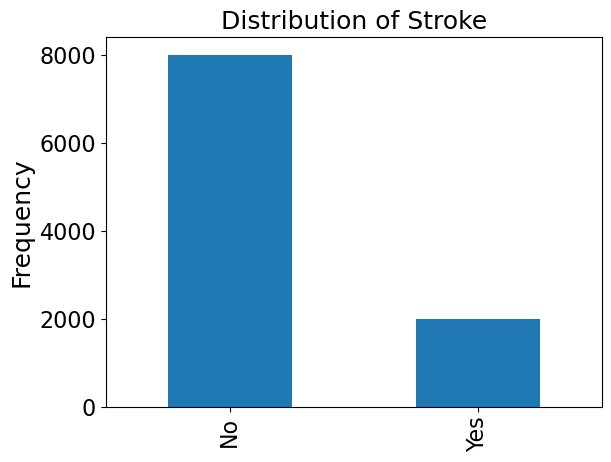

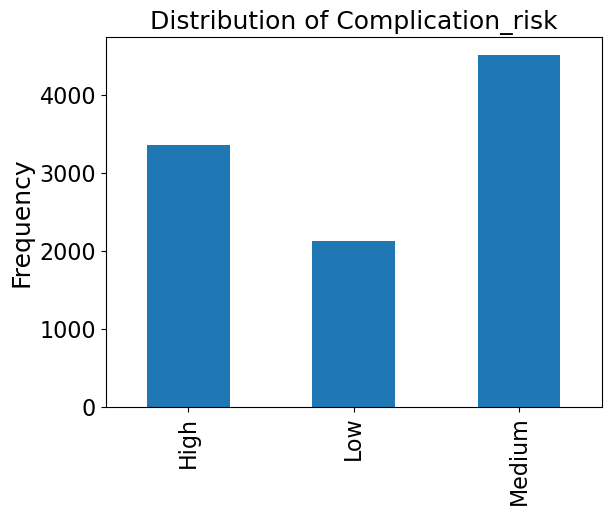

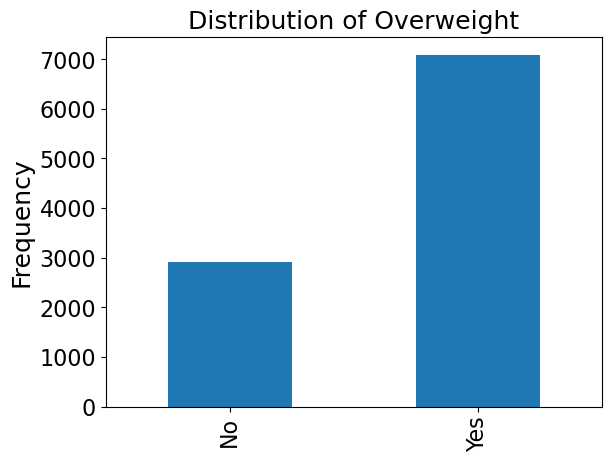

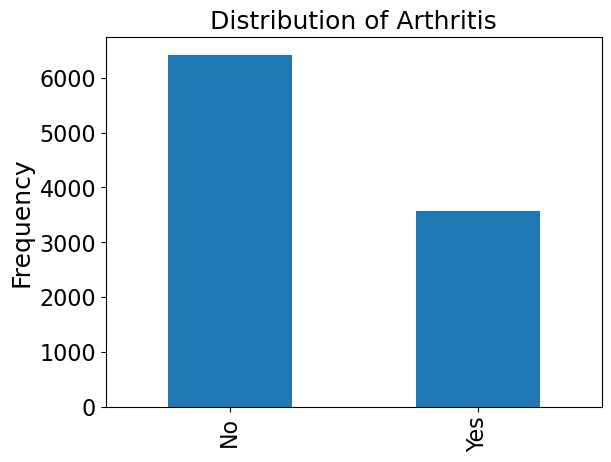

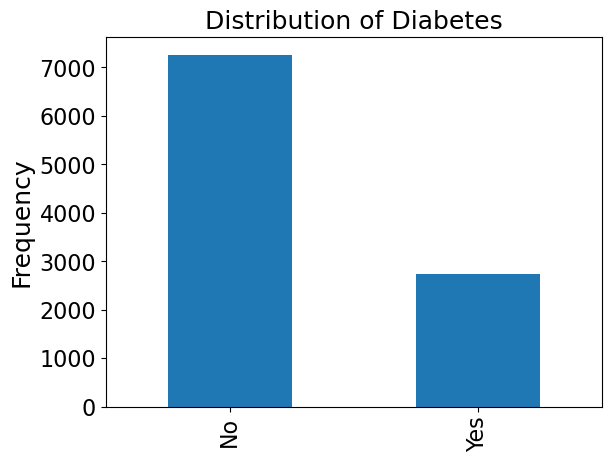

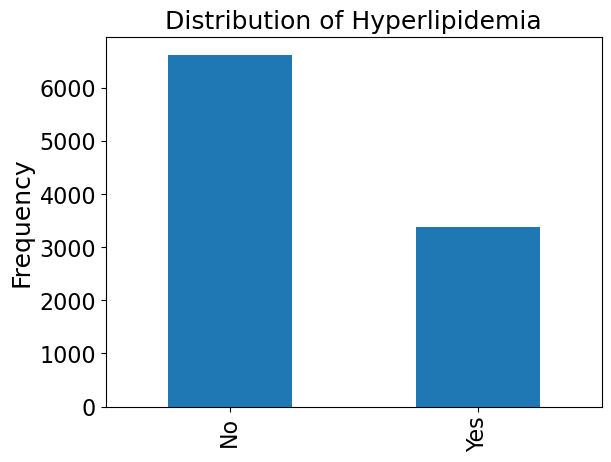

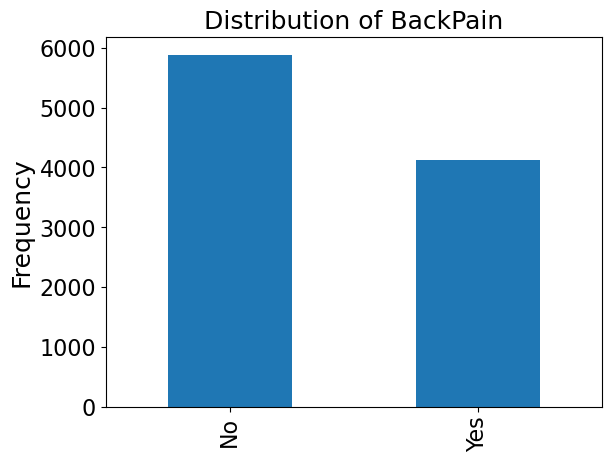

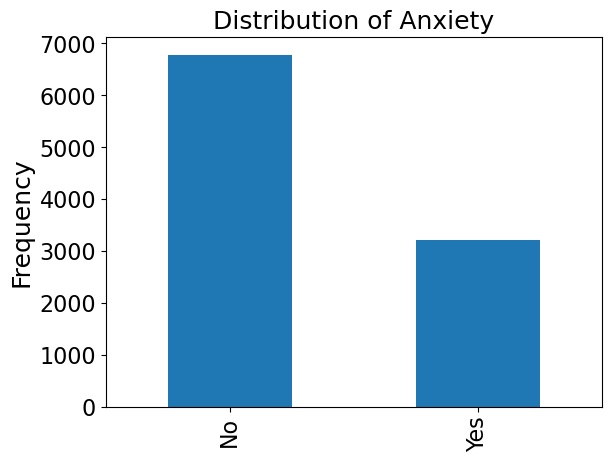

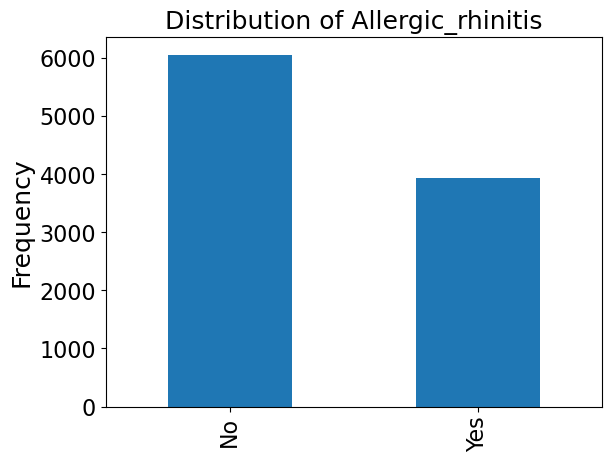

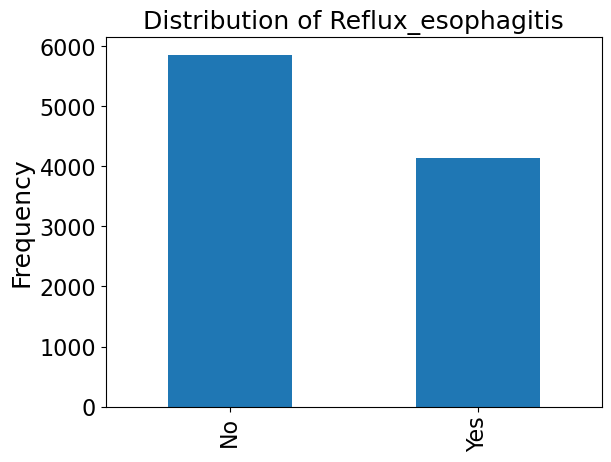

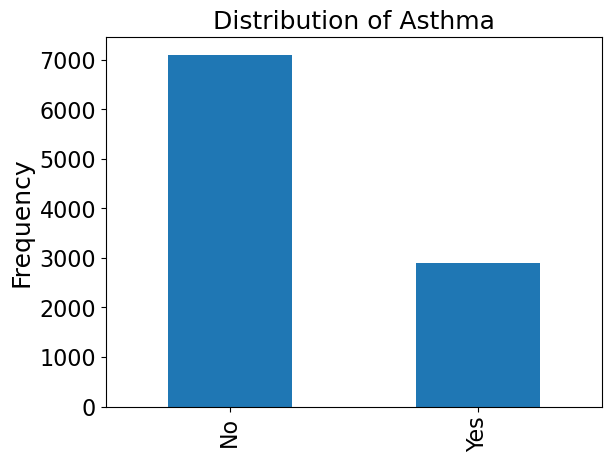

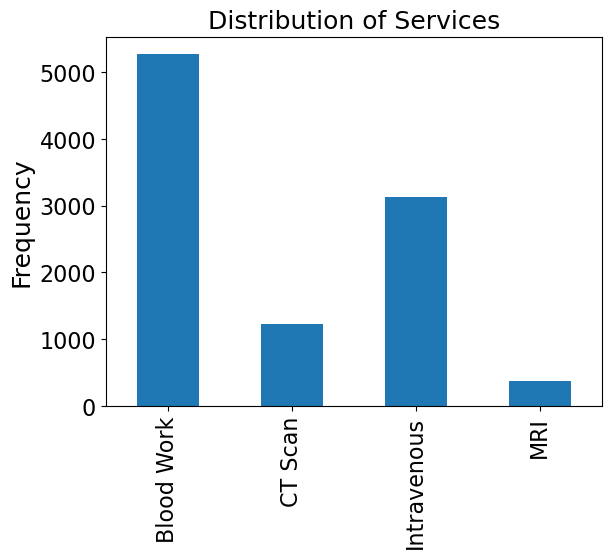

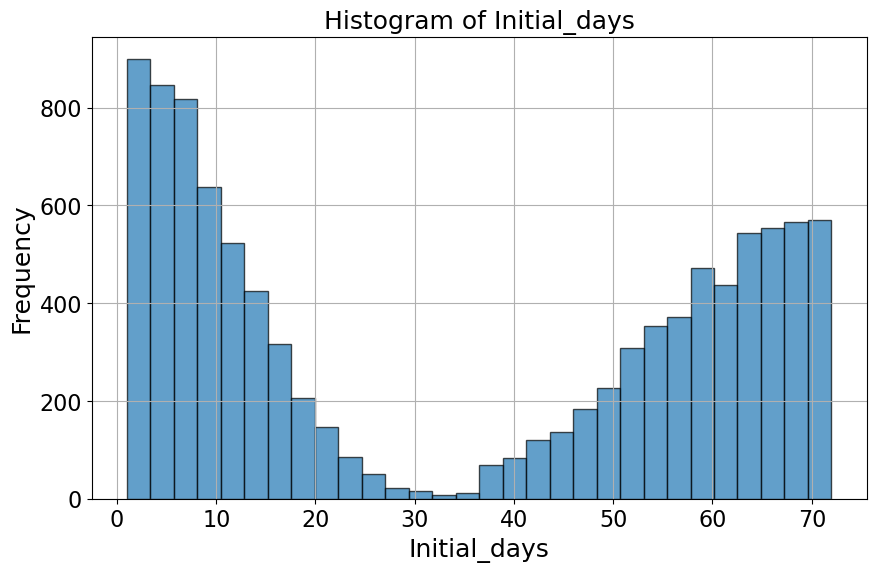

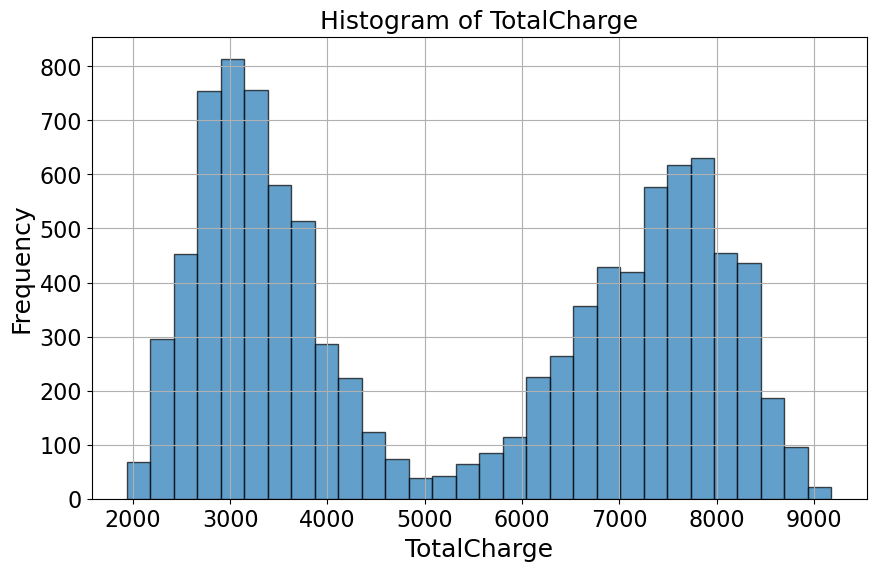

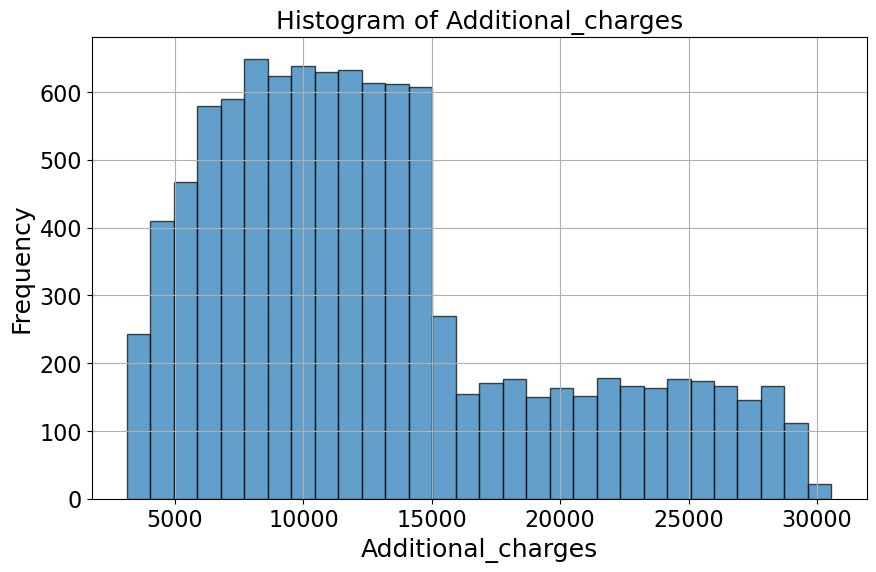

In [11]:
# Create univariate visualizations for each variable
for col in columns:
    if (df[col].dtype != 'object'):
        plt.figure(figsize=(10, 6))
        plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col}', fontsize=18)
        plt.xlabel(col, fontsize=18)
        plt.ylabel('Frequency', fontsize=18)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.grid(True)
        plt.show()
    else:
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}', fontsize=18)
        plt.ylabel('Frequency', fontsize=18)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.show()

# Bivariate Visualizations

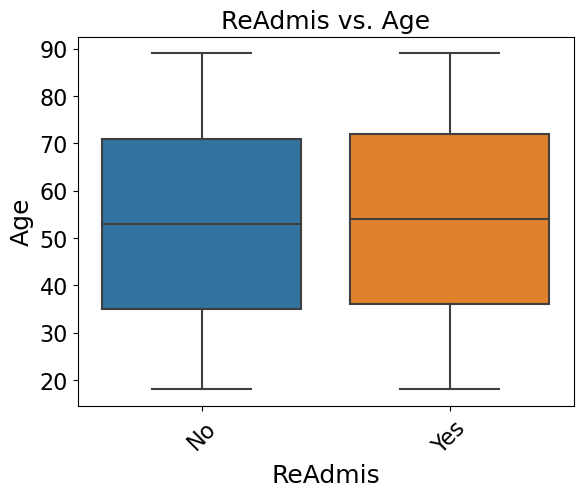

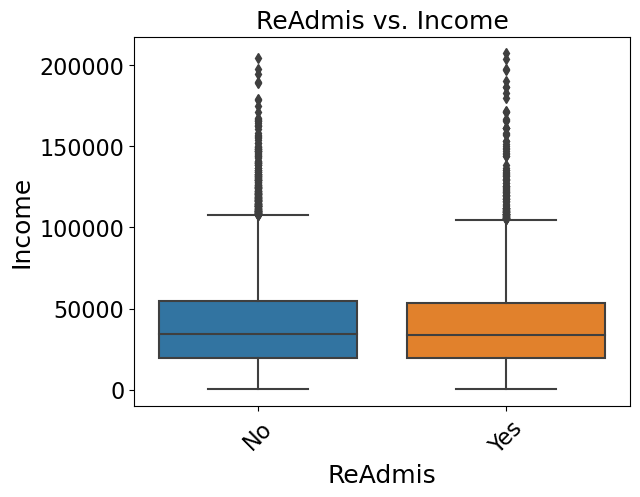

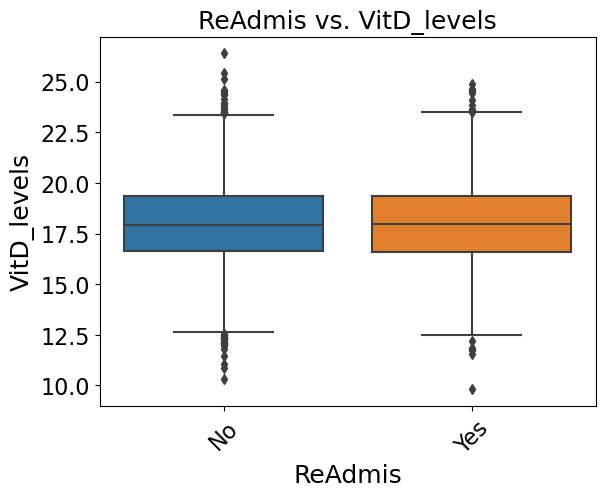

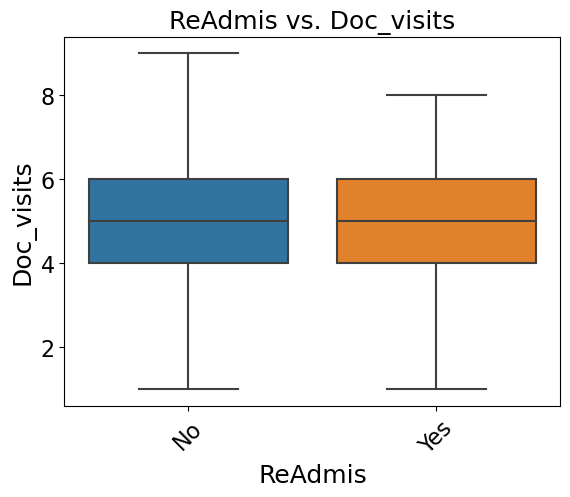

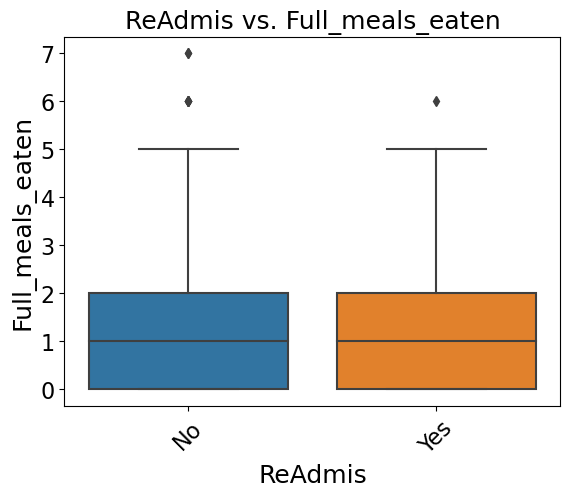

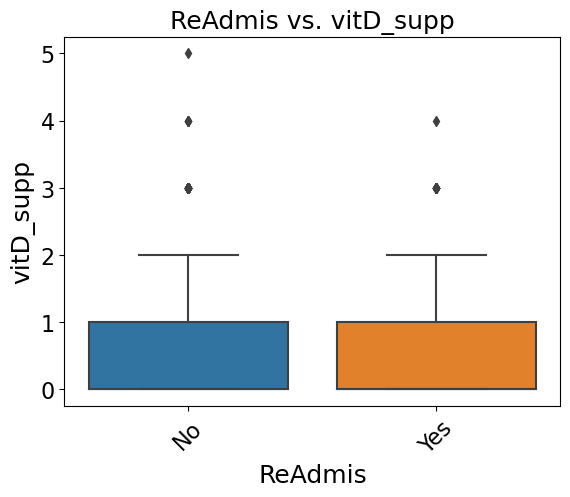

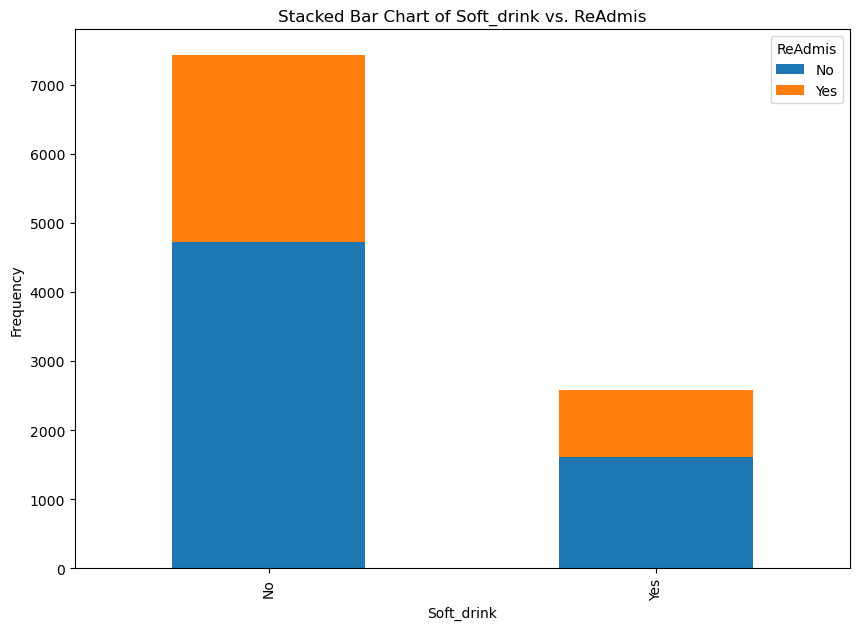

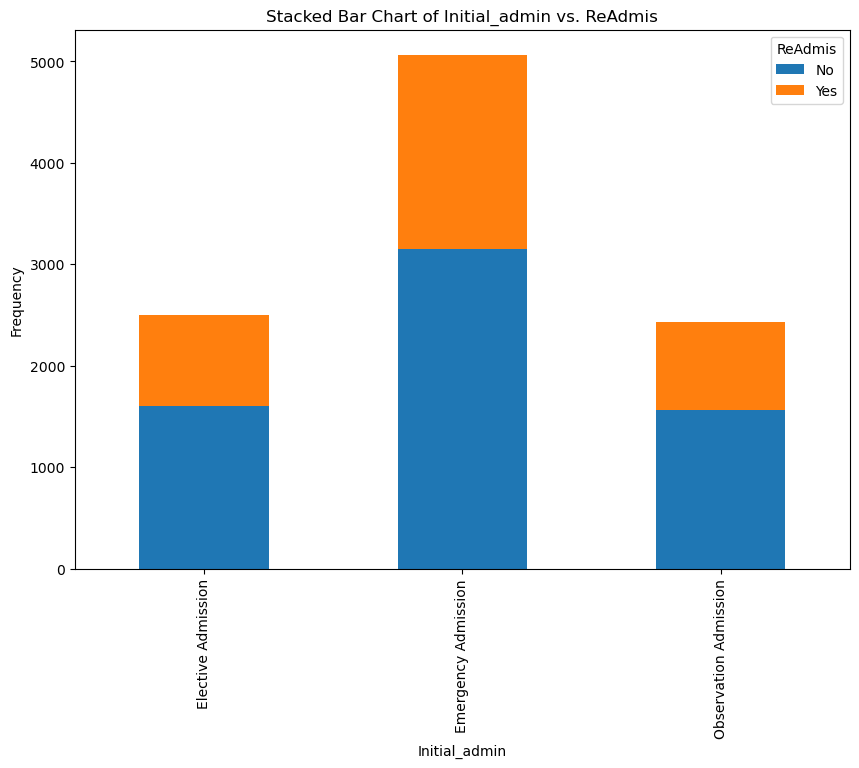

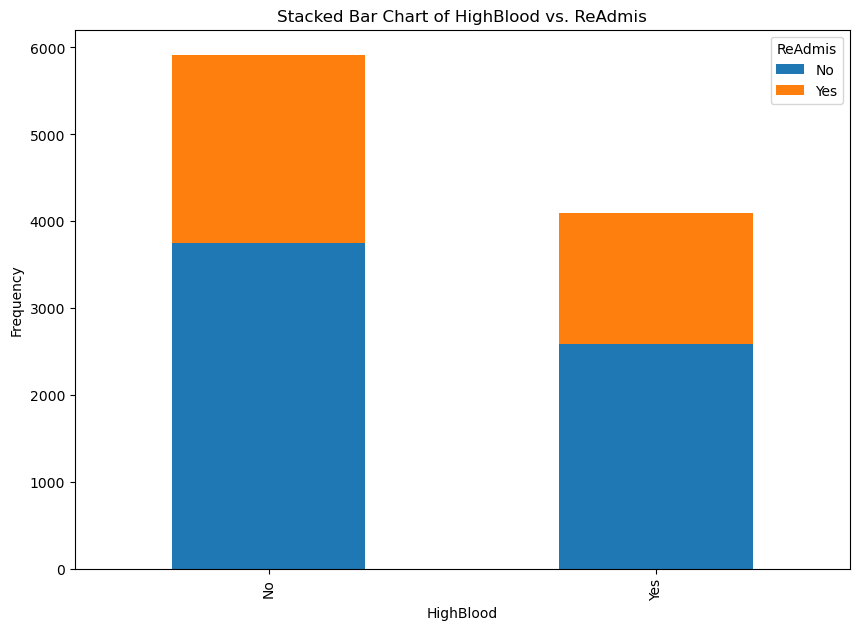

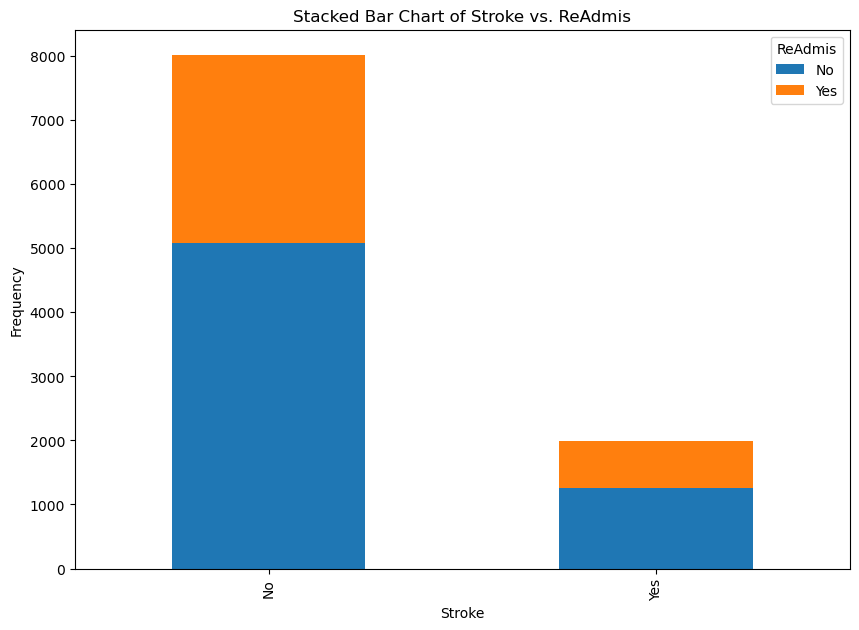

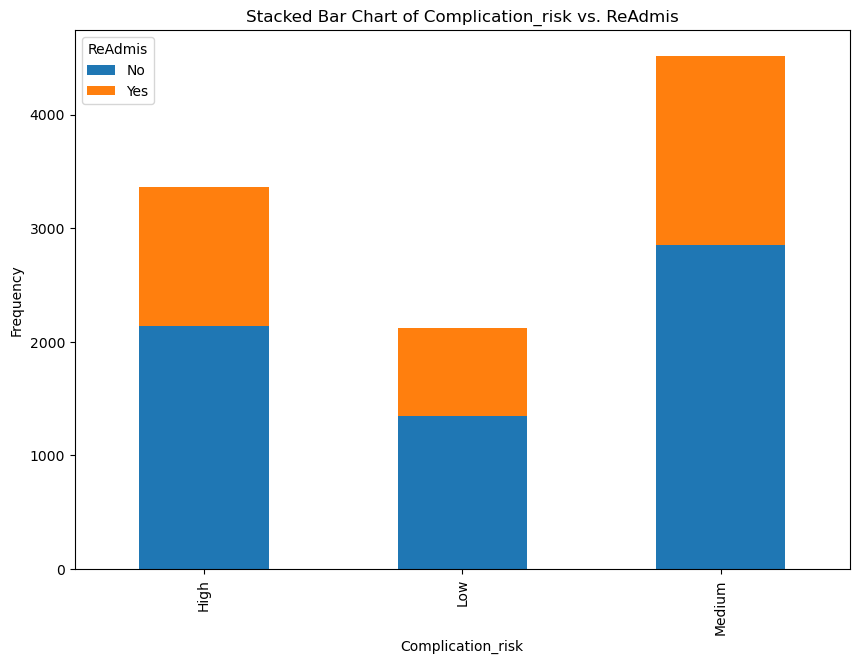

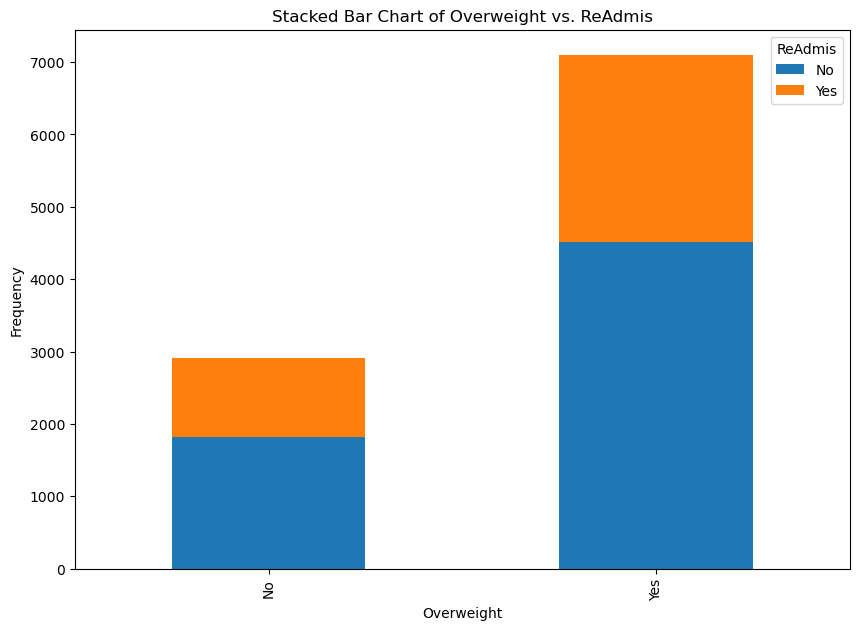

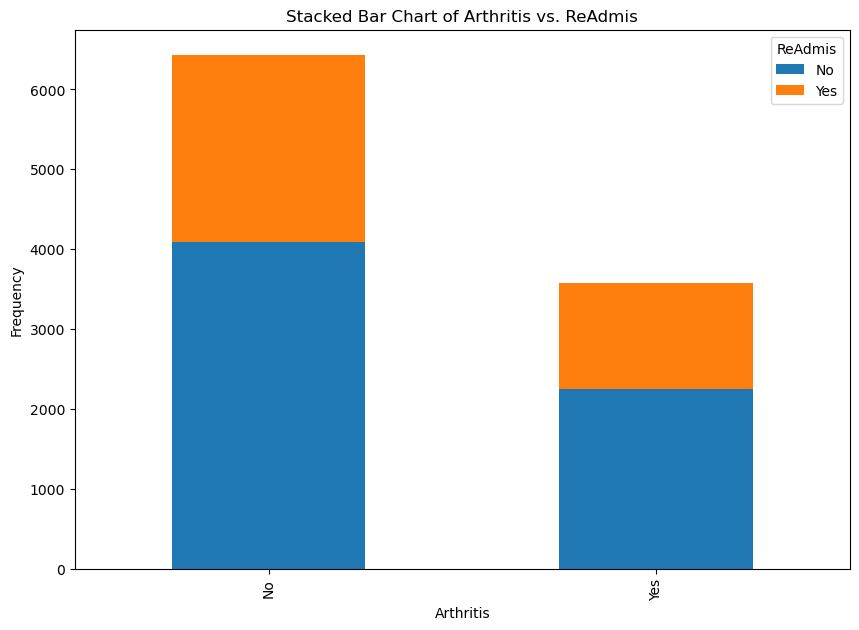

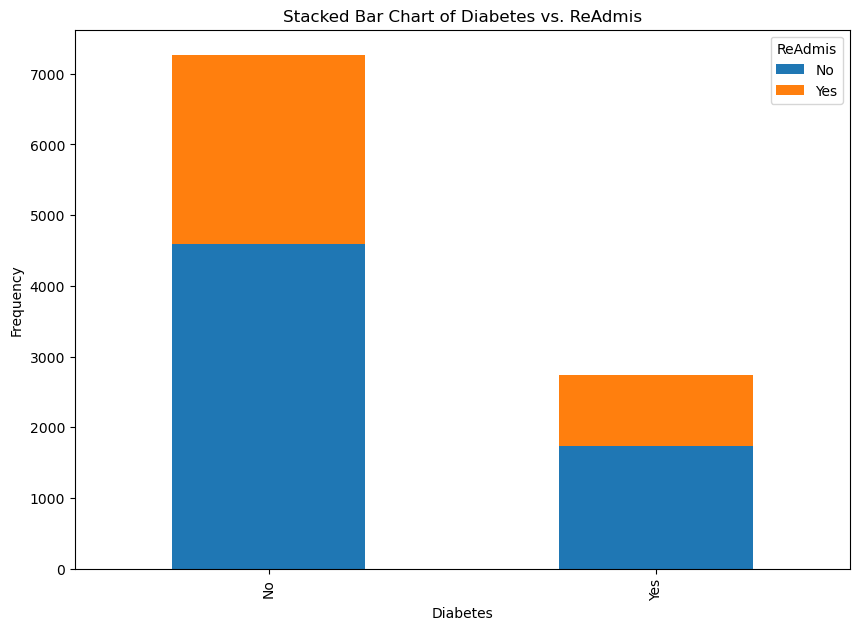

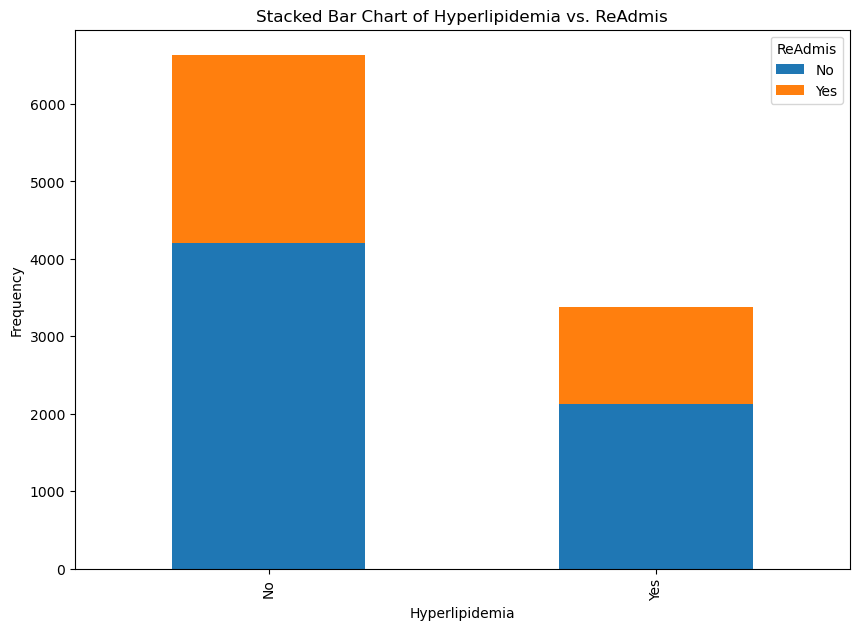

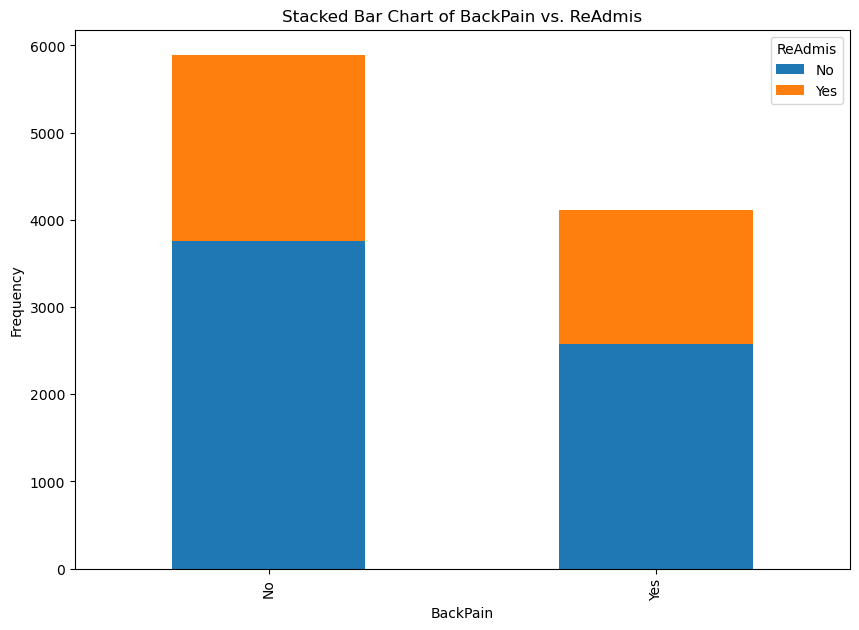

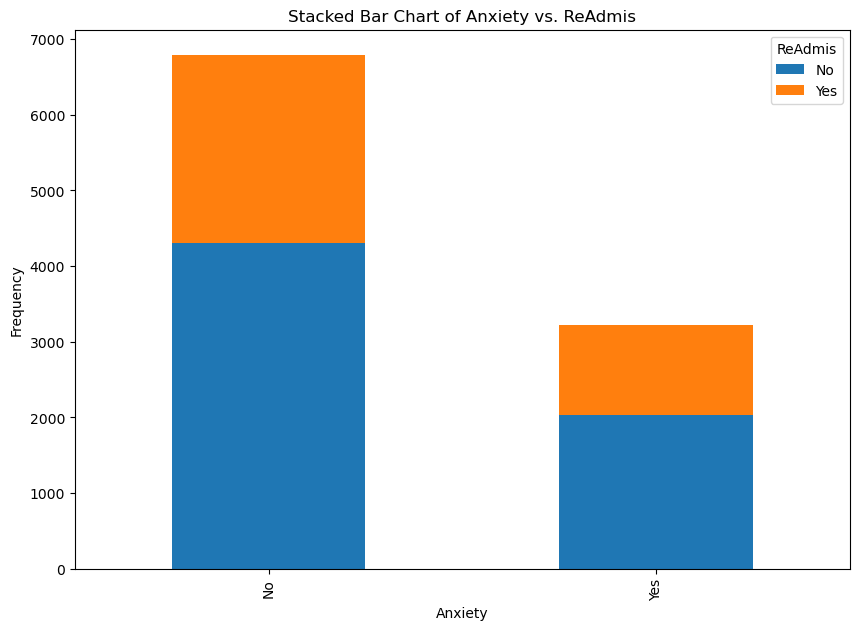

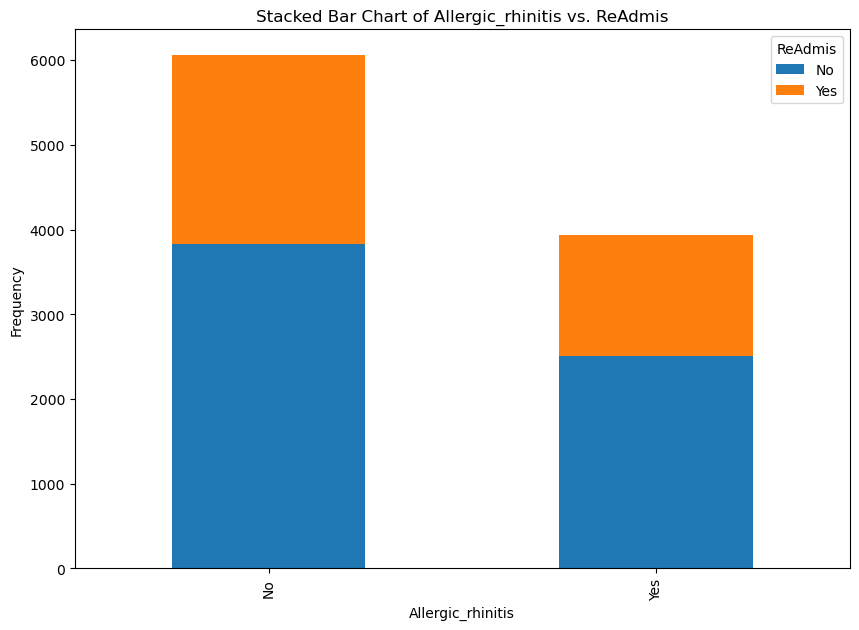

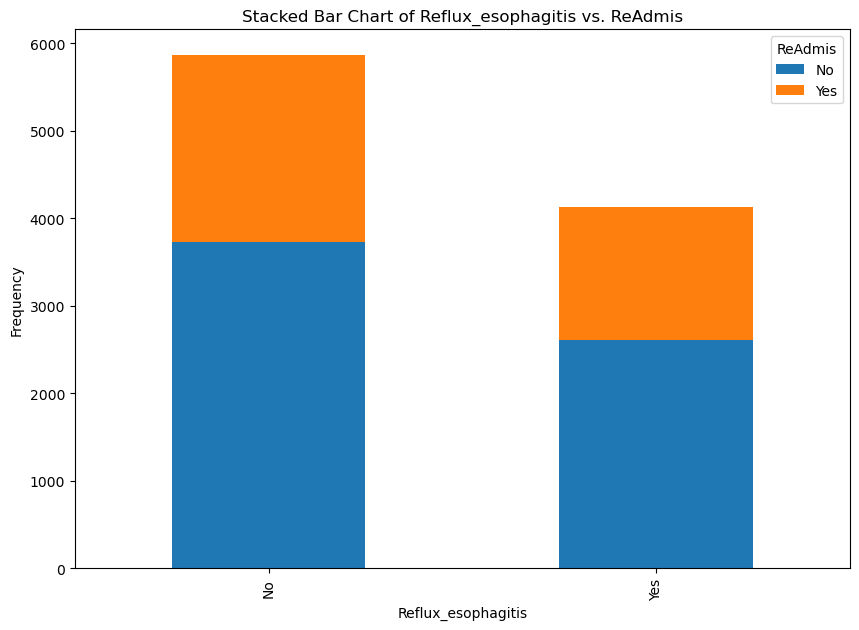

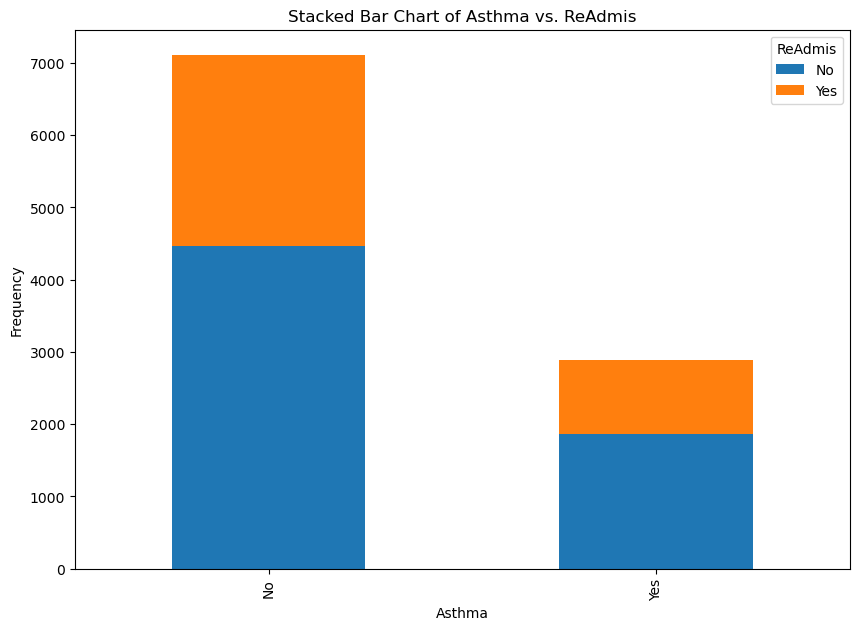

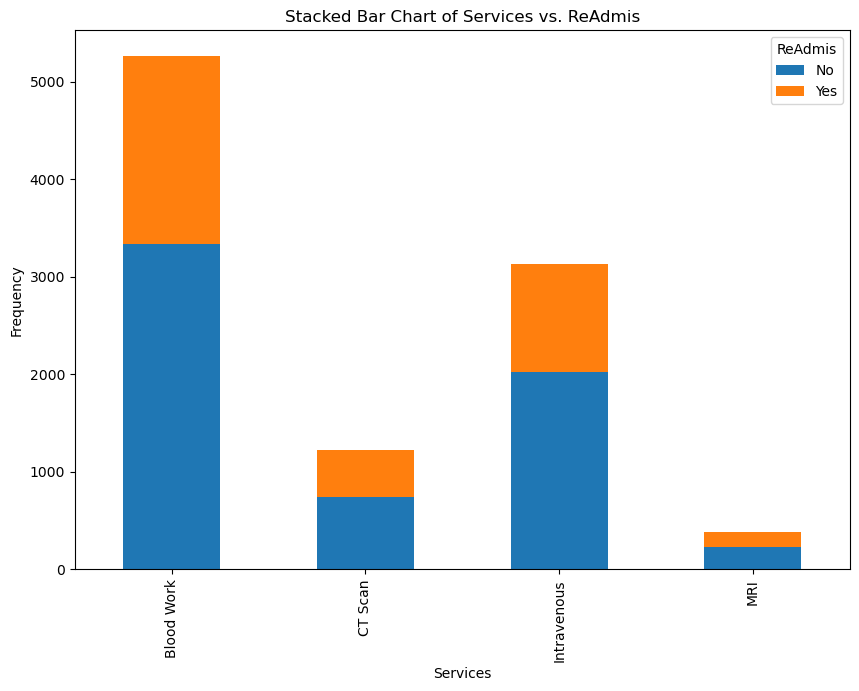

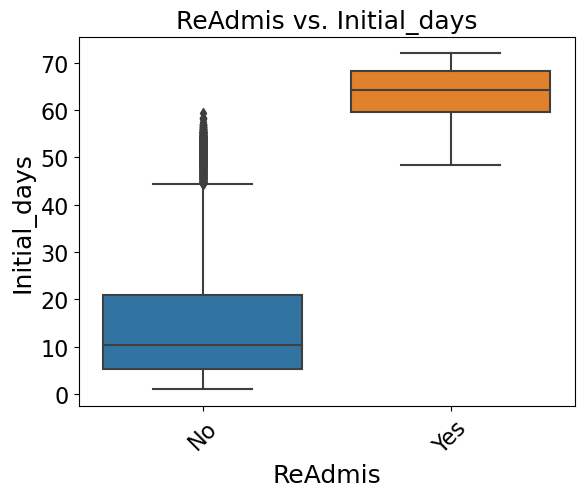

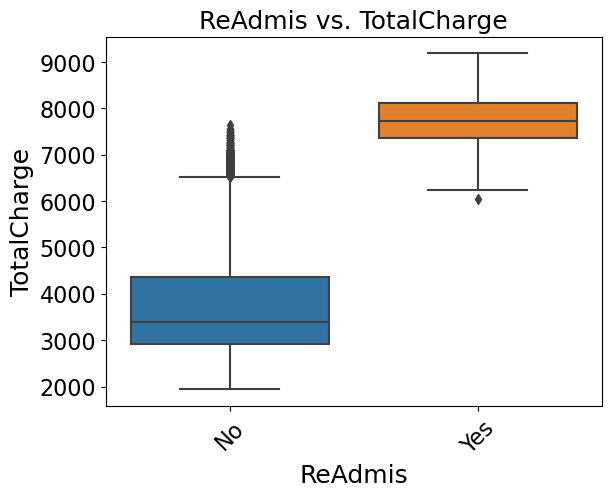

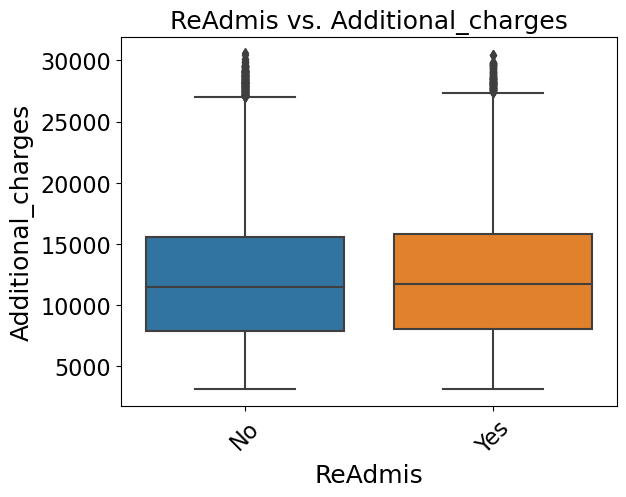

In [12]:
# Create bivariate visualizations for each dependent/independent variable combination
for col in columns:
    if col != 'ReAdmis':
        # Scatterplot if continuous vs. continuous
        if df[col].dtype == 'object':
            freq_table = pd.crosstab(index=df[col], columns=df['ReAdmis'])
    
            # Plotting the stacked bar chart
            freq_table.plot(kind='bar', stacked=True, figsize=(10, 7))
            plt.title(f'Stacked Bar Chart of {col} vs. ReAdmis')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.legend(title='ReAdmis')
            plt.show()
        # Boxplot if continuous vs. categorical
        else:
            sns.boxplot(x='ReAdmis', y=col, data=df)
            plt.title(f'ReAdmis vs. {col}', fontsize=18)
            plt.xlabel('ReAdmis', fontsize=18)
            plt.ylabel(col, fontsize=18)
            plt.tick_params(axis='x', which='major', labelsize=14, rotation=45)
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.show()

# Encoding

In [13]:
# Encode yes/no columns with simple replacement
yes_no_columns = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 
                  'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
                  'Asthma']

df[yes_no_columns] = df[yes_no_columns].replace({'No': 0, 'Yes': 1})

In [14]:
# One-hot encoding for remaining categorical variables (NumFOCUS, 2024)
df_encoded = pd.get_dummies(df, columns=['Initial_admin', 'Complication_risk', 
                                         'Services'], drop_first=True)

columns_to_rename = {
    'Initial_admin_Emergency Admission': 'Initial_admin_Emergency_Admission',
    'Initial_admin_Observation Admission': 'Initial_admin_Observation_Admission',
    'Services_CT Scan': 'Services_CT_Scan'
}

df_encoded = df_encoded.rename(columns=columns_to_rename)
df_encoded.columns

Index(['Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Initial_admin_Emergency_Admission',
       'Initial_admin_Observation_Admission', 'Complication_risk_Low',
       'Complication_risk_Medium', 'Services_CT_Scan', 'Services_Intravenous',
       'Services_MRI'],
      dtype='object')

In [15]:
# Export prepared data to CSV
df_encoded.to_csv('Prepared Medical Clean.csv', index=False)

# Modeling

In [16]:
# Initial model using all predictor variables (Broeck, n.d.a)
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + 
Soft_drink + HighBlood + Stroke + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_days + TotalCharge + Additional_charges + 
Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + 
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v1 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v1.summary())

         Current function value: 0.033211
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9971
Method:                           MLE   Df Model:                           28
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.9495
Time:                        11:59:35   Log-Likelihood:                -332.11
converged:                      False   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -78.4329   6.98e+05     -0.000      1.000   -1.37e+06   

C:\Users\drodgers\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:

# Add a constant term for the intercept
X = add_constant(df_encoded)

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values("VIF Factor", ascending=False)

# Inspect VIF values, sorted from highest to lowest
print(vif.round(1))

C:\Users\drodgers\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


      VIF Factor                             features
21  6.928615e+13                          TotalCharge
20  6.772330e+13                         Initial_days
23  9.587226e+11    Initial_admin_Emergency_Admission
26  6.187963e+11             Complication_risk_Medium
25  4.181033e+11                Complication_risk_Low
9   4.456472e+10                            HighBlood
14  2.885203e+10                       Hyperlipidemia
15  2.565394e+10                             BackPain
16  2.363871e+10                              Anxiety
12  1.737436e+10                            Arthritis
13  1.643254e+10                             Diabetes
17  1.280629e+10                    Allergic_rhinitis
18  1.262251e+10                   Reflux_esophagitis
22  1.630000e+01                   Additional_charges
1   9.300000e+00                                  Age
3   3.600000e+00                              ReAdmis
24  1.500000e+00  Initial_admin_Observation_Admission
28  1.100000e+00            

In [18]:
# Removed TotalCharge
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + 
Soft_drink + HighBlood + Stroke + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_days + Additional_charges + 
Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + 
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v2 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v2.summary())

Optimization terminated successfully.
         Current function value: 0.033211
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9972
Method:                           MLE   Df Model:                           27
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.9495
Time:                        11:59:35   Log-Likelihood:                -332.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -82.0276      4.714

In [19]:
# Re-run VIF after dropping TotalCharge from dataset
df_encoded = df_encoded.drop('TotalCharge', axis=1)

# Add a constant term for the intercept
X = add_constant(df_encoded)

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values("VIF Factor", ascending=False)

# Inspect VIF values, sorted from highest to lowest
print(vif.round(1))

    VIF Factor                             features
0        130.1                                const
21        16.3                   Additional_charges
1          9.2                                  Age
9          7.8                            HighBlood
20         3.7                         Initial_days
3          3.6                              ReAdmis
22         1.5    Initial_admin_Emergency_Admission
23         1.5  Initial_admin_Observation_Admission
24         1.3                Complication_risk_Low
25         1.3             Complication_risk_Medium
27         1.1                 Services_Intravenous
26         1.1                     Services_CT_Scan
28         1.0                         Services_MRI
10         1.0                               Stroke
6          1.0                     Full_meals_eaten
15         1.0                             BackPain
4          1.0                          VitD_levels
13         1.0                             Diabetes
5          1

In [20]:
# Removed TotalCharge, Additional_charges
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + 
Soft_drink + HighBlood + Stroke + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_days +
Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + 
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v3 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v3.summary())

Optimization terminated successfully.
         Current function value: 0.033237
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9973
Method:                           MLE   Df Model:                           26
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.9494
Time:                        11:59:36   Log-Likelihood:                -332.37
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -82.1562      4.711

In [21]:
# Re-run VIF after dropping Additional_charges from the dataset
df_encoded = df_encoded.drop('Additional_charges', axis=1)

# Assuming df_encoded is your DataFrame and it already includes all numeric predictors
# Add a constant term for the intercept
X = add_constant(df_encoded)

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values("VIF Factor", ascending=False)

# Inspect VIF values, sorted from highest to lowest
print(vif.round(1))

    VIF Factor                             features
0        128.0                                const
20         3.6                         Initial_days
3          3.6                              ReAdmis
21         1.5    Initial_admin_Emergency_Admission
22         1.5  Initial_admin_Observation_Admission
23         1.3                Complication_risk_Low
24         1.3             Complication_risk_Medium
26         1.1                 Services_Intravenous
25         1.1                     Services_CT_Scan
27         1.0                         Services_MRI
6          1.0                     Full_meals_eaten
15         1.0                             BackPain
4          1.0                          VitD_levels
7          1.0                            vitD_supp
8          1.0                           Soft_drink
5          1.0                           Doc_visits
13         1.0                             Diabetes
14         1.0                       Hyperlipidemia
19         1

In [22]:
# Removed TotalCharge, Additional_charges, Initial_days
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + 
Soft_drink + HighBlood + Stroke + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + 
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v4 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v4.summary())

Optimization terminated successfully.
         Current function value: 0.655962
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9975
Method:                           MLE   Df Model:                           24
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.002013
Time:                        11:59:36   Log-Likelihood:                -6559.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.3303
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.7119      0.212 

In [23]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + 
Soft_drink + HighBlood + Stroke + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_admin_Emergency_Admission +
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v5 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v5.summary())

Optimization terminated successfully.
         Current function value: 0.655962
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.002013
Time:                        11:59:36   Log-Likelihood:                -6559.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2797
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.7112      0.210     -3

In [24]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + 
Soft_drink + HighBlood + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_admin_Emergency_Admission +
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v6 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v6.summary())

Optimization terminated successfully.
         Current function value: 0.655962
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.002012
Time:                        11:59:36   Log-Likelihood:                -6559.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2326
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.7107      0.210     -3

In [25]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + 
Soft_drink + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_admin_Emergency_Admission +
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v7 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v7.summary())

Optimization terminated successfully.
         Current function value: 0.655965
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.002009
Time:                        11:59:36   Log-Likelihood:                -6559.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1915
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.7073      0.209     -3

In [26]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + 
Soft_drink + Overweight + Arthritis + Diabetes + 
Hyperlipidemia + BackPain + Allergic_rhinitis + Reflux_esophagitis + 
Asthma + Initial_admin_Emergency_Admission +
Complication_risk_Low + Complication_risk_Medium + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v8 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v8.summary())

Optimization terminated successfully.
         Current function value: 0.655968
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.002004
Time:                        11:59:36   Log-Likelihood:                -6559.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1546
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.7044      0.209     -3

In [27]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis + 
Diabetes + Hyperlipidemia + BackPain + Allergic_rhinitis + Reflux_esophagitis + Asthma + 
Initial_admin_Emergency_Admission + Complication_risk_Medium + Services_CT_Scan + Services_Intravenous + 
Services_MRI
'''

mdl_readmis_v9 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v9.summary())

Optimization terminated successfully.
         Current function value: 0.655972
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001998
Time:                        11:59:36   Log-Likelihood:                -6559.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1230
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6977      0.207     -3

In [28]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis + 
Hyperlipidemia + BackPain + Allergic_rhinitis + Reflux_esophagitis + Asthma + 
Initial_admin_Emergency_Admission + Complication_risk_Medium + Services_CT_Scan + Services_Intravenous + 
Services_MRI
'''

mdl_readmis_v10 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v10.summary())

Optimization terminated successfully.
         Current function value: 0.655976
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001992
Time:                        11:59:36   Log-Likelihood:                -6559.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.09570
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.7028      0.207     -3

In [29]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis +
Hyperlipidemia + BackPain + Allergic_rhinitis + Reflux_esophagitis + Asthma + 
Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous + Services_MRI
'''

mdl_readmis_v11 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v11.summary())

Optimization terminated successfully.
         Current function value: 0.655981
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001985
Time:                        11:59:36   Log-Likelihood:                -6559.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.07279
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6976      0.206     -3

In [30]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia
formula = '''
ReAdmis ~ Age + Income + VitD_levels + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis +
BackPain + Allergic_rhinitis + Reflux_esophagitis + Asthma + Initial_admin_Emergency_Admission +
Services_CT_Scan + Services_Intravenous + Services_MRI
'''

mdl_readmis_v12 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v12.summary())

Optimization terminated successfully.
         Current function value: 0.655987
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001975
Time:                        11:59:36   Log-Likelihood:                -6559.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.05448
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6918      0.205     -3

In [31]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis + BackPain + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan + 
Services_Intravenous + Services_MRI
'''

mdl_readmis_v13 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v13.summary())

Optimization terminated successfully.
         Current function value: 0.655994
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001964
Time:                        11:59:37   Log-Likelihood:                -6559.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.03992
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6218      0.090     -6

In [32]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis + BackPain + 
Allergic_rhinitis + Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous + 
Services_MRI
'''

mdl_readmis_v14 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v14.summary())

Optimization terminated successfully.
         Current function value: 0.656005
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001947
Time:                        11:59:37   Log-Likelihood:                -6560.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.02914
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6130      0.088     -6

In [33]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + Soft_drink + Overweight + Arthritis + BackPain + 
Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous + Services_MRI
'''

mdl_readmis_v15 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v15.summary())

Optimization terminated successfully.
         Current function value: 0.656018
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001928
Time:                        11:59:37   Log-Likelihood:                -6560.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.02079
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6207      0.087     -7

In [34]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + Overweight + Arthritis + BackPain +  Asthma + 
Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous + Services_MRI
'''

mdl_readmis_v16 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v16.summary())

Optimization terminated successfully.
         Current function value: 0.656049
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001881
Time:                        11:59:37   Log-Likelihood:                -6560.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01614
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6118      0.086     -7

In [35]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + Overweight + BackPain +  Asthma + 
Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous + Services_MRI
'''

mdl_readmis_v17 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v17.summary())

Optimization terminated successfully.
         Current function value: 0.656080
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001833
Time:                        11:59:37   Log-Likelihood:                -6560.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01231
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5994      0.085     -7

In [36]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + Overweight + BackPain +  Asthma + 
Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous
'''

mdl_readmis_v18 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v18.summary())

Optimization terminated successfully.
         Current function value: 0.656114
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001783
Time:                        11:59:37   Log-Likelihood:                -6561.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.009257
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5937      0.085     -7

In [37]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + vitD_supp + BackPain +  Asthma + 
Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous
'''

mdl_readmis_v19 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v19.summary())

Optimization terminated successfully.
         Current function value: 0.656149
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001729
Time:                        11:59:37   Log-Likelihood:                -6561.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.006825
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6216      0.078     -7

In [38]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
# vitD_supp
formula = '''
ReAdmis ~ Age + Income + Full_meals_eaten + BackPain +  Asthma + Initial_admin_Emergency_Admission + 
Services_CT_Scan + Services_Intravenous
'''

mdl_readmis_v20 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v20.summary())

Optimization terminated successfully.
         Current function value: 0.656204
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001645
Time:                        11:59:37   Log-Likelihood:                -6562.0
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.005648
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6078      0.077     -7

In [39]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
# vitD_supp, Income
formula = '''
ReAdmis ~ Age + Full_meals_eaten + BackPain +  Asthma + Initial_admin_Emergency_Admission + 
Services_CT_Scan + Services_Intravenous
'''

mdl_readmis_v21 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v21.summary())

Optimization terminated successfully.
         Current function value: 0.656262
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001557
Time:                        11:59:37   Log-Likelihood:                -6562.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.004653
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6409      0.070     -9

In [40]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
# vitD_supp, Income, Full_meals_eaten
formula = '''
ReAdmis ~ Age + BackPain +  Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan + 
Services_Intravenous
'''

mdl_readmis_v22 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v22.summary())

Optimization terminated successfully.
         Current function value: 0.656331
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001452
Time:                        11:59:37   Log-Likelihood:                -6563.3
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.004022
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6642      0.067     -9

In [41]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
# vitD_supp, Income, Full_meals_eaten, BackPain
formula = '''
ReAdmis ~ Age + Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan + Services_Intravenous
'''

mdl_readmis_v23 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v23.summary())

Optimization terminated successfully.
         Current function value: 0.656411
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001330
Time:                        11:59:37   Log-Likelihood:                -6564.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.003676
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6437      0.065     -9

In [42]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
# vitD_supp, Income, Full_meals_eaten, BackPain, Services_Intravenous
formula = '''
ReAdmis ~ Age + Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan
'''

mdl_readmis_v24 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v24.summary())

Optimization terminated successfully.
         Current function value: 0.656523
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                0.001160
Time:                        11:59:37   Log-Likelihood:                -6565.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.004216
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6681      0.063    -10

In [43]:
# Removed TotalCharge, Additional_charges, Initial_days, Initial_admin_Observation_Admission, Stroke,
# HighBlood, Anxiety, Complication_risk_Low, Diabetes, Complication_risk_Medium, Hyperlipidemia,
# VitD_levels, Reflux_esophagitis, Allergic_rhinitis, Soft_drink, Arthritis, Services_MRI, Overweight
# vitD_supp, Income, Full_meals_eaten, BackPain, Services_Intravenous, Age
formula = '''
ReAdmis ~ Asthma + Initial_admin_Emergency_Admission + Services_CT_Scan
'''

mdl_readmis_v25 = logit(formula=formula, data=df_encoded).fit()

print(mdl_readmis_v25.summary())

Optimization terminated successfully.
         Current function value: 0.656648
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:               0.0009688
Time:                        11:59:37   Log-Likelihood:                -6566.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.005245
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5827      0.033    -17

In [44]:
# Collect model names in a list
model_names = [f'mdl_readmis_v{i}' for i in range(1, 26)]

# Iterate over model names to print AIC and BIC
for name in model_names:
    model = locals().get(name)  # Access the model object by name
    if model is not None:  # Check if the model name exists in the local scope
        print(f"{name} - AIC: {model.aic:.2f}, BIC: {model.bic:.2f}")
    else:
        print(f"{name} not found")


mdl_readmis_v1 - AIC: 722.23, BIC: 931.33
mdl_readmis_v2 - AIC: 720.23, BIC: 922.12
mdl_readmis_v3 - AIC: 718.74, BIC: 913.42
mdl_readmis_v4 - AIC: 13169.24, BIC: 13349.50
mdl_readmis_v5 - AIC: 13167.24, BIC: 13340.29
mdl_readmis_v6 - AIC: 13165.25, BIC: 13331.09
mdl_readmis_v7 - AIC: 13163.30, BIC: 13321.93
mdl_readmis_v8 - AIC: 13161.36, BIC: 13312.77
mdl_readmis_v9 - AIC: 13159.44, BIC: 13303.64
mdl_readmis_v10 - AIC: 13157.52, BIC: 13294.52
mdl_readmis_v11 - AIC: 13155.61, BIC: 13285.40
mdl_readmis_v12 - AIC: 13153.74, BIC: 13276.31
mdl_readmis_v13 - AIC: 13151.88, BIC: 13267.25
mdl_readmis_v14 - AIC: 13150.11, BIC: 13258.27
mdl_readmis_v15 - AIC: 13148.36, BIC: 13249.30
mdl_readmis_v16 - AIC: 13146.97, BIC: 13240.70
mdl_readmis_v17 - AIC: 13145.60, BIC: 13232.13
mdl_readmis_v18 - AIC: 13144.27, BIC: 13223.58
mdl_readmis_v19 - AIC: 13142.97, BIC: 13215.07
mdl_readmis_v20 - AIC: 13142.07, BIC: 13206.97
mdl_readmis_v21 - AIC: 13141.24, BIC: 13198.92
mdl_readmis_v22 - AIC: 13140.62, B